<img src="Logo_P10.PNG" height="100" width="600" >
<h1 style="color:blue; text-align:center; background-color:AliceBlue; font-size:300%; font-family:verdana; border:2px solid DodgerBlue"><br>LUTTE CONTRE LE FAUX-MONNAYAGE<br>
<h5 style="color:black; text-align:right">NGUYEN Huynh Thanh Qui<br>Février 2022<br></h5>
</h1>

In [1]:
#Importation de bibliothèques
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np
#!pip install --upgrade scikit-learn
from sklearn import decomposition
from sklearn import preprocessing, metrics, cluster
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
from sklearn import neighbors
import scipy.cluster
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import colorama
from colorama import Fore, Back, Style
#from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

<h4 style="color:Maroon; text-align:left; font-size:100%; font-family:Georgia"><br>Cliquer sur ce boton pour faire apparaître/disparaître le code</h4>

In [2]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

<h1 style="color:black; text-align:center; background-color:GhostWhite; font-size:300%; font-family:Georgia; border:2px solid LightSteelBlue"><br>PARTIE 2<br><br>Analyse de données<br></h1>

In [3]:
# Importation
## Données complets pour la modélisation
billets_complet = pd.read_csv("billets_complet.csv", sep = ";")
## Données pour tester du fonctionnement du modèle
billets_production = pd.read_csv("billets_production.csv")

<h3 style="color:royalblue; text-align:center; font-size:110%; font-family:Georgia"><br><u>Information générale de nos données</u></h3>

In [4]:
billets_complet.info()
billets_complet.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


(1500, 7)

<ul style="font-family:Time">
      <li>Dans le contexte de mettre en place une modélisation qui serait capable d’identifier automatiquement les vrais des faux billets, j'utilise d'abord un méthode de classification supervisée qui s'appelle <b>Régression logistique</b></li>
      <li><i>"L'objectif de la régression logistique est de modéliser, de classifier, une variable binaire prenant ses valeurs dans {0,1} en fonction de variables explicatives quantitatives (et potentiellement qualitatives)"</i>  (source : <a href="https://openclassrooms.com/fr/courses/4525326-realisez-des-modelisations-de-donnees-performantes/5754148-apprehendez-le-fonctionnement-de-la-regression-logistique">OpenClassrooms</a>). Dans ce cas, le variable à expliquer qualitative signifie des vrais et faux billets, qui sont présentés respectivement par 1 et 0</li>
      <li>Cependant, afin de vérifier la fiabilité de cette méthode ainsi que sa performance de prédiction, j'utilise également un autre méthode de classification non-supervisée qui s'appelle <b>Partitionnement (classification) K-MEANS</b>. Le but est de mettre en concurrence deux méthodes de prédiction pour sélectionner l'algorithme le plus performant possible
pour identifier un maximum de faux billets au sein de la masse de billets analysés</li>
      <li>Pour construire les modèles de prédictions, je divise les données en 2 parties qui seviront aux données d'apprentissages et de test (pour vérifier la capacité prédictive des modèles) (à noter que toutes données utilisées sont normalisées en 0 et 1). La division est aléatoire et suit une proportion de 80/20 (apprentissage/test) </li>

In [5]:
# Normalisation de données entre 0 et 1
def normalisation(data):
    scaler = preprocessing.MinMaxScaler()
    normalized = scaler.fit(data).transform(data)
    # Homologuer les noms des colonnes normalisées
    normalized_data = pd.DataFrame(normalized)
    normalized_data.columns = data.columns
    normalized_data.index = data.index
    #print(Fore.BLUE + Style.BRIGHT + f"Données normalisées" + Style.RESET_ALL)
    return normalized_data

<h3 style="color:royalblue; text-align:center; font-size:110%; font-family:Georgia"><br><u>Préparation des données d'apprentissage (80%) et de test (20%)</u></h3>

In [6]:
billets_complet_norma = normalisation(billets_complet)
x_training, x_test, y_training, y_test = train_test_split(billets_complet_norma,
                                                          billets_complet_norma['is_genuine'],
                                                          train_size = 0.8)#, shuffle=False) 

In [7]:
x_test.drop(columns = "is_genuine", inplace = True)

In [8]:
print(Fore.BLUE + Style.BRIGHT + f"Données d'apprentissage (avec variable dépendante ('is_genuine')) et les types de billets correspondants"+ Style.RESET_ALL )

print(f"Nombre de billets d'apprentissage: {y_training.shape[0]}")
display(x_training.head())
display(x_training.shape)
print(f"L'étiquette de données 'test':")

display(y_training.head())

Données d'apprentissage (avec variable dépendante ('is_genuine')) et les types de billets correspondants
Nombre de billets d'apprentissage: 1200


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
105,1.0,0.837563,0.425287,0.563725,0.329082,0.567073,0.767361
199,1.0,0.654822,0.597701,0.553922,0.334184,0.439024,0.949242
926,1.0,0.370558,0.281609,0.333333,0.137755,0.640244,0.672191
1497,0.0,0.253968,0.946317,0.664181,0.555521,1.000000,0.000000
306,1.0,0.649746,0.488506,0.539216,0.316327,0.414634,0.737753


(1200, 7)

L'étiquette de données 'test':


105     1.0
199     1.0
926     1.0
1497    0.0
306     1.0
Name: is_genuine, dtype: float64

In [9]:
print(Fore.BLUE + Style.BRIGHT + f"Données de test (sans variable dépendante ('is_genuine')) et les types de billets correspondants"+ Style.RESET_ALL )
print(f"Nombre de billets d'apprentissage : {y_test.shape[0]}")
display(x_test.head())
display(x_test.shape)
print(f"L'étiquette de données 'test':")
display(y_test.head())

Données de test (sans variable dépendante ('is_genuine')) et les types de billets correspondants
Nombre de billets d'apprentissage : 300


,diagonal,height_left,height_right,margin_low,margin_up,length
831,0.421320,0.465517,0.299020,0.244898,0.457317,0.790625
416,0.441624,0.488506,0.289216,0.109694,0.396341,0.725063
358,0.345178,0.580460,0.411765,0.285714,0.439024,0.771591
88,0.456853,0.201149,0.446078,0.321429,0.560976,0.731408
1223,0.284264,0.436782,0.690141,0.798469,0.780488,0.258586


(300, 6)

L'étiquette de données 'test':


831     1.0
416     1.0
358     1.0
88      1.0
1223    0.0
Name: is_genuine, dtype: float64

<h3 style="color:royalblue; text-align:center; font-size:110%; font-family:Georgia"><br><u>Vérification la performance de prédiction</u><br><br> Matrice de confusion</h3>

<ul style="font-family:Time"> 
    <li>La fiabilité des modèles sera vérifiée par la matrice de confusion et les indicateurs présentés en-dessous  </li>
    <img src="P10_Matrice_confusion.PNG" height="100" width="600" >
    <li>En générale, ce matice évalue la cohérence entre les étiquettes générées par les modèles (0 et 1) et celles de données "test" (régression logistique)/données brutes (partitionnement K-MEANS)</li>
    <li>Les données qui <b>sont prédites correctement</b> sont classées dans le groupe nommé <b>"VRAIS"</b> (et l'inverse pour le groupe "FAUX"). Les étiquettes <b>1</b> et <b>0</b> sont nommées <b>"POSITIF"</b> et <b>"NEGATIF"</b></li>
</ul>

<h2 style="color:black; text-align:center; background-color:AliceBlue; font-size:150%; font-family:Georgia; border:2px solid DodgerBlue"><br>I. Régression logistique<br></h2>

In [10]:
# Transformer les types de billets en binaire (True == 1 et False == 0)
#billets_complet["is_genuine"] = billets_complet["is_genuine"].astype(int)

<ul style="font-family:Time"> 
    <li>La modélisation de la variable binaire (catégorielle dans ce cas) en utilisant la régression logistique demande une donnée d'apprentissage complète (données contenant de variable dépendante "is_genuine"). C'est pour cette raison, j'utilise les données <b>x_training</b></li>
    <li>Le résultat de cette régression se trouve toujours entre 0 et 1, ce qui correspond à la probabilité d'apparaître de l'événement qu'on souhaite à analyser. Dans notre cas, j'utilise le seuil de la <b>probabilité d'acceptable de vrais billets à 50%</b> pour la prédiction. Plus précisément, si le résultat est suppérieur ou égale à 0,5, ce billet est classé comme un vrai et l'inverse pour les faux billets</li>
</ul>

In [11]:
#test_reg_log_complet = smf.glm('is_genuine~margin_low+diagonal+height_left+height_right+margin_up+length', data=billets_complet, family=sm.families.Binomial()).fit()
#print(test_reg_log_complet.summary())

<h3 style="color:royalblue; text-align:left; font-size:110%; font-family:Georgia"><br>1. <u>Génération du modèle de la régression logistique en utilisant les données d'apprentissage</u></h3>

In [12]:
# Entraînement du modèle de la régression logistique en utilisant données d'apprentissage
formula = "is_genuine~margin_low+diagonal+height_left+height_right+margin_up+length"
model_glm = smf.glm(formula = formula, data = x_training, family = sm.families.Binomial())

model_GLM = model_glm.fit()
print(model_GLM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1193
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16.969
Date:                Sat, 12 Feb 2022   Deviance:                       33.938
Time:                        17:22:50   Pearson chi2:                     67.4
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.1239      6.239      1.943   

<h6 style="color:royalblue; text-align:left; font-family:Georgia"><br><u>Modèle de la régression logistique</u></h6>
<ul style="font-family:Time">
    <b>model_GLM = model_glm.predcit()</b>
</ul>

<h3 style="color:royalblue; text-align:left; font-size:110%; font-family:Georgia"><br>2. <u>Matrice de confusion entre les données "test" et les résultats prédictifs de la régression logistique</u></h3>

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96       103
         1.0       0.97      0.99      0.98       197

    accuracy                           0.97       300
   macro avg       0.98      0.96      0.97       300
weighted avg       0.97      0.97      0.97       300

[[ 96   7]
 [  1 196]]


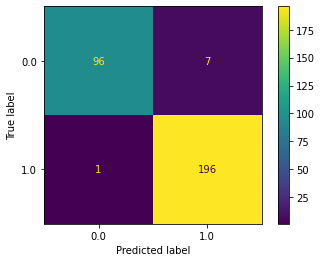

In [13]:
# Matrice de confusion
predictions_glm = model_GLM.predict(x_test)

# définir le seuil de la probabilité d'acceptable de vrais billets
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions_glm]

print(classification_report(y_test, predictions_nominal))
print(confusion_matrix(y_test, predictions_nominal))

ConfusionMatrixDisplay.from_predictions(y_test, predictions_nominal)
plt.show()

In [14]:
#precision_glm = precision_score(y_test, predictions_nominal, pos_label=1.0)
#recall_glm = recall_score(y_test, predictions_nominal, pos_label=1.0)
#TP / (TP + FP)
#print(f"Precision score: {precision_glm:.2f}")
#print(f"Recall score: {precision_glm:.2f}")

<h2 style="color:black; text-align:center; background-color:AliceBlue; font-size:150%; font-family:Georgia; border:2px solid DodgerBlue"><br>II. Clustering K-MEAN<br></h2>

<ul style="font-family:Time"> 
    <li>Contrairement à la régression logistique, le technique de partitionnement K-MEANS n'utilise pas le variable à expliquer ('is_genuine') car il correspond à une classification <b>non-paramétrique</b></li>
    <li>La performance de cette méthode sera évaluée par l'indice de <b>l'homogénéite</b> et <b>la matrice de confusion</b> entre les clusters prédits et les types de billets issus de données brutes (et complètes)</li>
    <li>Le choix du nombre de clusters K-MEANS est basé sur le résultat de la méthode du coude</li>

In [15]:
# Extraction de données
print(Fore.BLUE + Style.BRIGHT + f"Données normalisées pour la classification K-MEANS"+ Style.RESET_ALL )
billets_k_means = billets_complet_norma.loc[:,['margin_low','diagonal','height_left','height_right','margin_up','length']]
display(billets_k_means.head())
display(billets_k_means.shape)

Données normalisées pour la classification K-MEANS


,margin_low,diagonal,height_left,height_right,margin_up,length
0,0.392857,0.390863,0.988506,1.000000,0.378049,0.684880
1,0.201531,0.213198,0.126437,0.367647,0.439024,0.739867
2,0.362245,0.837563,0.770115,0.289216,0.408537,0.754672
3,0.163265,0.162437,0.442529,0.504902,0.451220,0.828693
4,0.270408,0.350254,0.655172,0.269608,0.737805,0.623548


(1500, 6)

<h3 style="color:royalblue; text-align:left; font-size:110%; font-family:Georgia"><br>1. <u>Choix du nombre de cluster K-MEANS</u>: méthode du coude</h3>

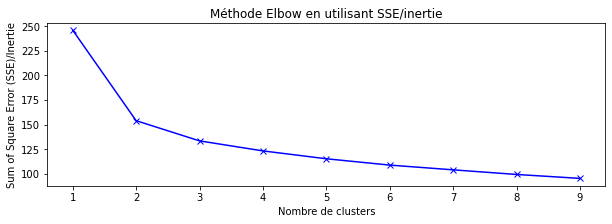

Nombre de groupes optimal choisi pour la méthode K-MEANS est 2


In [16]:
# Utilisation la méthode du coude pour trouver le nombre de clusters (groupes) optimal
inertias = [] 
mapping = {} 
K = range(1,10) 
  
for k in K: 
    kmeanModel = KMeans(n_clusters=k, random_state=0 ).fit(billets_k_means)     
    inertias.append(kmeanModel.inertia_) 
    mapping[k] = kmeanModel.inertia_ 
    
#Valeurs de SSE (Sum of Square Error)
#for key,val in mapping.items(): 
    #print(str(key)+' : '+str(val)) 
    
plt.figure(figsize = (10,3))
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Nombre de clusters') 
plt.ylabel('Sum of Square Error (SSE)/Inertie') 
plt.title('Méthode Elbow en utilisant SSE/inertie') 
plt.show()
print(Fore.BLUE + Style.BRIGHT + f"Nombre de groupes optimal choisi pour la méthode K-MEANS est 2"+ Style.RESET_ALL )

<h3 style="color:royalblue; text-align:left; font-size:110%; font-family:Georgia"><br>2. <u>Classification K-MEANS</u></h3>

In [17]:
n_clust = 2

# Clustering par K-means
model_km = KMeans(n_clusters= n_clust, random_state=0)
model_km.fit(billets_k_means)

# Récupération des clusters attribués à chaque individu
clusters = model_km.labels_
clusters = np.select([clusters == 0, clusters == 1], [1, 0], clusters)
names_final = billets_k_means.index
print(Fore.BLUE + Style.BRIGHT + f"" + Style.RESET_ALL)
k_moyenne = pd.DataFrame({"Cluster": clusters, "index" : names_final})
#k_moyenne.Cluster.replace([0, 1],[1, 0], inplace = True)

#k_moyenne["Cluster"] = k_moyenne["Cluster"] + 1 # Renommer les clusters
#print(k_moyenne.head())
k_moyenne_pivot = k_moyenne.pivot_table(index = "index", columns="Cluster", aggfunc=len, fill_value=0)
#k_moyenne_pivot.head()

In [18]:
Homogeneite_KMEANS = round(metrics.homogeneity_score(billets_complet_norma['is_genuine'], clusters)*100, 3)
print(Fore.BLUE + Style.BRIGHT + f"Homogénéite entre les données brutes et celles issues de la classification K-MEANS est {Homogeneite_KMEANS}%" + Style.RESET_ALL)

Homogénéite entre les données brutes et celles issues de la classification K-MEANS est 88.44%


In [19]:
print(f"Nombre de billets par cluster K-MEANS")
nb_billets = k_moyenne.groupby(by='Cluster').index.count().to_frame()
nb_billets.rename(columns = {'index': "Nombre de billet"}, inplace = True)
display(nb_billets)
print(Fore.BLUE + Style.BRIGHT + f"Grâce à la valeur de l'homogénéité citée en dessus, on peut déduire que \
presque 90% des clusters de K-MEANS sont similaires aux clusters de données brutes, \
malgré une différenciation dans la nommenclature du nom de clusters" + Style.RESET_ALL)

Nombre de billets par cluster K-MEANS


,Nombre de billet
Cluster,
0,495
1,1005


Grâce à la valeur de l'homogénéité citée en dessus, on peut déduire que presque 90% des clusters de K-MEANS sont similaires aux clusters de données brutes, malgré une différenciation dans la nommenclature du nom de clusters


<h6 style="color:royalblue; text-align:left; font-family:Georgia"><br><u>Modèle de la classification K-MEANS</u></h6>
<ul style="font-family:Time">
    <b>model_k_means = model_km.predict()</b>
</ul>

<h3 style="color:royalblue; text-align:left; font-size:110%; font-family:Georgia"><br>2. <u>Comparaison (par PCA) la répartition de clusters de K-MEANS et de données brutes sur un plan 2D</u></h3>

Text(0.5, 1.0, 'Projection des 2 centres K-MEANS')

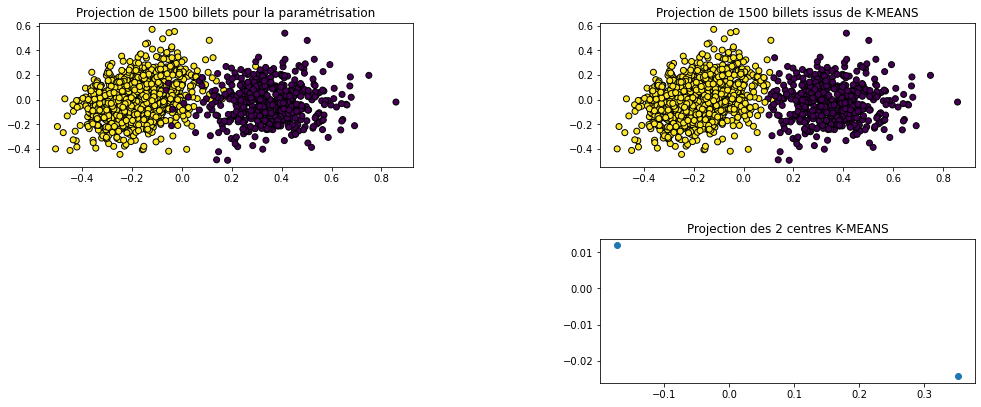

In [20]:
#Paramétrer la position et la taille des diagrammes
figure = plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2,
                       right = 1.5, top = 1, 
                       wspace = 0.5, hspace = 0.5)

# PCA des indivisus (billets)
pca = decomposition.PCA(n_components=2).fit(billets_k_means) # nombre de components = 2
X_projected = pca.transform(billets_k_means)

# Affichage du clustering k-means

axes = figure.add_subplot(3, 2, 2)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), edgecolor="k")
plt.title(f"Projection de {X_projected.shape[0]} billets issus de K-MEANS")

# Affichage de billet par type (données intitiales)
axes = figure.add_subplot(3, 2, 1)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=billets_complet_norma.is_genuine.astype(np.float), edgecolor="k")
#plt.title("Projection de {} billets pour la paramétrisation".format(X_projected.shape[0]))
plt.title(f"Projection de {X_projected.shape[0]} billets pour la paramétrisation")


axes = figure.add_subplot(3, 2, 4)
centroids = model_km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title(f"Projection des {len(centroids)} centres K-MEANS")

<h3 style="color:royalblue; text-align:left; font-size:110%; font-family:Georgia"><br>3. <u>Matrice de confusion entre les données brutes et les clusters de K_MEANS</u></h3>

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       500
         1.0       0.99      0.99      0.99      1000

    accuracy                           0.99      1500
   macro avg       0.99      0.98      0.98      1500
weighted avg       0.99      0.99      0.99      1500

[[487  13]
 [  8 992]]


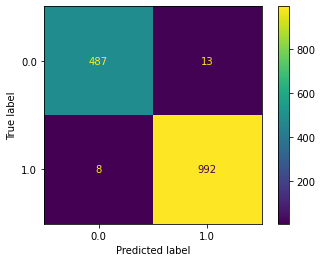

In [21]:
# Matrice de confusion entre les clusters de K_MEANS et les types de billets d'apprentissage
print(classification_report(billets_complet_norma['is_genuine'], clusters))
print(confusion_matrix(billets_complet_norma['is_genuine'], clusters))
ConfusionMatrixDisplay.from_predictions(billets_complet_norma['is_genuine'], clusters)
plt.show()

<h4 style="color:Maroon; text-align:left; font-size:100%; font-family:Georgia"><br><u>Remarque</u> (si les indicateurs affichés en-dessus ayant une valeur inférieure à 0,15 )<br></h4>
<ul style="font-family:Time">
    <li>La précision et le rappel (ou autres indicateurs) du matrice de confusion obtenus dans le cas de la classification K-MEANS peuvent avoir des valeurs très faibles <b>(inférieurs à 0,05)</b>. Ce phénomène ne signifie pas qu'elle n'est pas fiable ou n'a pas de capacité prédictive car <b>presque 90% des données classifiées sont cohérentes aux données brutes</b> (partie II.2)</li> 
    <li>Cette situation dû à la <b>nomenclature automatique de clusters</b> issus de la <b>classification non-supervisée</b>. Pour avoir les bons résultats, il faut les recalculer en utilisant ce formule: <b>(1 -  Valeur d'Indicateur)</b> </li>
    <li><b>Les indicateurs doivent normalement ayant une valeur suppérieure à 0,95 (ou 95%)</b></li>
</ul>

<h2 style="color:black; text-align:center; background-color:AliceBlue; font-size:150%; font-family:Georgia; border:2px solid DodgerBlue"><br>III. Choix du modèle<br></h2>

<ul style="font-family:Time">
    <li>La <b>précision</b> signifie <b>le pourcentage de valeurs positives/négatives prédites</b> qui sont <b>réellement positives/négatives</b></li>
    <li>Le <b>rappel (recall)</b> signifie <b>le pourcentage de valeurs positives/négatives qui sont été <b>correctement</b> prédites sur tous les enregistrements positifs/négatives</b></li>
    <li>Afin de choisir le modèle le plus performant, je vais comparer les valeurs des indicateurs cités en-dessus; plus qu'elles sont grandes, plus le modèle est fiable</li>
    <li>En comparant les résultats de matrices de confusion issus des 2 méthodes (appliqués sur les mêmes données 'test'), on peut déduire que <b>la régression logistique</b> est <b>plus performante</b> que la classification K-MEANS. De plus, un des points négatifs du partitionnenement K-MEANS est la nomenclature des clusters. En fait, c'est une classification non paramétrique, donc, la génération du nom de clusters est aléatoire et peut causer une incohérence du nom de billets prédictifs</li>
</ul>

<h1 style="color:black; text-align:center; background-color:GhostWhite; font-size:300%; font-family:Georgia; border:2px solid LightSteelBlue"><br>PARTIE 3<br><br>Test du modèle<br></h1>

In [22]:
def identification_billet_RL(data_a_verifie):
    data_extract = data_a_verifie.loc[:, ["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]]
    data_norma = normalisation(data_extract)

    # Régression logistique
    predictions_glm = model_GLM.predict(data_norma)
    predictions_glm
    predictions_nominal_glm = [ "False" if x < 0.5 else "True" for x in predictions_glm]

    predict_RL_df = pd.DataFrame(predictions_nominal_glm)
    predict_RL_df.rename(columns = {0:"Classe_RL"}, inplace = True)
    
    data_frames = [predict_RL_df, data_a_verifie]
    predict_comp1 = pd.concat(data_frames, join='inner', axis=1)
    return predict_comp1

def identification_billet_K_MEANS(data_a_verifie):
    data_extract = data_a_verifie.loc[:, ["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]]
    data_norma = normalisation(data_extract)
    
    # K_MEANS
    predict_k_means = model_km.predict(data_norma)
    predict_k_means = np.select([predict_k_means == 0, predict_k_means == 1], ["True", "False"], predict_k_means)
    
    predict_KMEANS_df = pd.DataFrame(predict_k_means)
    predict_KMEANS_df.rename(columns = {0:"Classe_KMEANS"}, inplace = True)
    
    data_frames = [predict_KMEANS_df, data_a_verifie]
    predict_comp2 = pd.concat(data_frames, join='inner', axis=1)
    return predict_comp2

<h4 style="color:Maroon; text-align:left; font-size:100%; font-family:Georgia"><br>Copier et remplacer le nom dans les parenthèses par le nom du dataframe contenant les données de billets à analyser</h4>

<h4 style="color:Navy; text-align:center; font-size:100%; font-family:Georgia; background-color:LemonChiffon; border:2px solid DarkOrange"><br>identification_billet_RL(data_a_verifie)<br></h4>

<h4 style="color:Maroon; text-align:left; font-size:100%; font-family:Georgia"><br>Exemple d'un test de l’algorithme </h4>

<ul style="font-family:Time">
identification_billet_RL(billets_production)
</ul>

In [23]:
identification_billet_RL(billets_production)

,Classe_RL,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,False,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,False,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,False,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,True,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,True,171.65,103.63,103.56,3.77,3.16,113.33,A_5
